# INTRODUCTION
<b>Title: Elon Musk's Tweets </b>

<b>Author: Edline Dallal</b>

<b>Date: 12/11/2022</b>

# Elon Musk's Tweets Dataset 2022 

## 1) ask 

<b>
 1. How many tweets are defined as Positive, Negative &  Neutral sentiments?
    
 2. In what months the tweets by Elon musk are higher comparison to other months across the year?  
    
 2. In what day/days across the week the tweets by Elon musk are higher?  


## 2) Prepare

<b>1. The data "Elon Musk's Tweets Dataset 2022" is downloaded from Kaggle: https://www.kaggle.com/datasets/marta99/elon-musks-tweets-dataset-2022. </b>

<b>2. Information on Data Source:<b>

Elon Musk is a business magnate and investor. He is the founder, CEO, and chief engineer of SpaceX; angel investor, CEO, and product architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. With an estimated net worth of around $210 billion as of October 26, 2022, Musk is the wealthiest person in the world according to both the Bloomberg Billionaires Index and Forbes' real-time billionaires list.

<b>3. The following file is selected and copied for analysis:</b>
    
- cleandata.csv

<b> 4. The Environment used in this dataset is: 
    
- pandas
- numpy
- datetime
- seaborn
- textblob
- matplotlib.pyplot    

In [31]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time
from textblob import TextBlob #textblob  for sentiments
import seaborn as sns # data visualization


In [2]:
# reading the file in CSV format
df = pd.read_csv('cleandata.csv')

In [3]:
#gets first rows  by using head function
# discover the dataframe, columns and data in the dataset
df.head(5)

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


<b>the dataset has 5 columns as shown, the tweets column, retweet for this tweet, number of likes, the tweet gets, date of the tweet and cleaned tweets

In [4]:
# get the info of the dataframe by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweets          2668 non-null   object
 1   Retweets        2668 non-null   int64 
 2   Likes           2668 non-null   int64 
 3   Date            2668 non-null   object
 4   Cleaned_Tweets  2668 non-null   object
dtypes: int64(2), object(3)
memory usage: 104.3+ KB


<b>the dataframe has 5 columns, three of ocject dtype and two of int dtype.  
    the date column dtype is object, it should be transformed  to date dtype 

In [5]:
# obtain the # of missing data points per column
missing_values_count = df.isnull().sum()

# check null values in each column
missing_values_count[:]

Tweets            0
Retweets          0
Likes             0
Date              0
Cleaned_Tweets    0
dtype: int64

<b>no null data in the dataframe

In [6]:
# convert "Date" to datatime64 dtype
df["Date"] = pd.to_datetime(df["Date"])

# re-print info() to confirm
df['Date'].info()

# print the first 3 rows of "Date" to confirm
df["Date"].head(3)

<class 'pandas.core.series.Series'>
RangeIndex: 2668 entries, 0 to 2667
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2668 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.0 KB


0   2022-10-27 16:17:39
1   2022-10-27 13:19:25
2   2022-10-27 13:08:00
Name: Date, dtype: datetime64[ns]

<b>Creating new list with rearranged column names and renaming daily_activity to a shorter name df_activity.

In [7]:
# create new list of rearranged columns and create new column 'DayOfTheWeek'
new_cols = ['Cleaned_Tweets', 'Likes','Retweets','Date', 'Day_of_Week', 'Month', 'Month_Name', 'Tweets']

# reindex function to rearrange columns based on "new_cols"
df = df.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df.head(5)

,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets
0,thanks,7021,209,2022-10-27 16:17:39,NaN,NaN,NaN,@PeterSchiff 🤣 thanks
1,Absolutely,26737,755,2022-10-27 13:19:25,NaN,NaN,NaN,@ZubyMusic Absolutely
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,NaN,NaN,NaN,Dear Twitter Advertisers https://t.co/GMwHmInPAS
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,NaN,NaN,NaN,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,NaN,NaN,NaN,Entering Twitter HQ – let that sink in! https:...


<b>Creating new column by separating the date into day of the week for further analysis.



In [8]:
# create new column "day_of_the_week" to represent day of the week 
df["Day_of_Week"] = df["Date"].dt.day_name()

# create new column "Month" to represent month
df['Month'] = pd.DatetimeIndex(df['Date']).month 

# create new column "Month_Name" to represent month's name
df['Month_Name']= pd.to_datetime(df['Month'], format='%m').dt.month_name()

#print the new two columns to chech the data
df.loc[:, 'Day_of_Week':'Month_Name']

,Day_of_Week,Month,Month_Name
0,Thursday,10,October
1,Thursday,10,October
2,Thursday,10,October
3,Wednesday,10,October
4,Wednesday,10,October
...,...,...,...
2663,Thursday,1,January
2664,Thursday,1,January
2665,Thursday,1,January
2666,Thursday,1,January


In [9]:
# print column names to confirm
print(df.columns.values)
df.head(5)

['Cleaned_Tweets' 'Likes' 'Retweets' 'Date' 'Day_of_Week' 'Month'
 'Month_Name' 'Tweets']


,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets
0,thanks,7021,209,2022-10-27 16:17:39,Thursday,10,October,@PeterSchiff 🤣 thanks
1,Absolutely,26737,755,2022-10-27 13:19:25,Thursday,10,October,@ZubyMusic Absolutely
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,Thursday,10,October,Dear Twitter Advertisers https://t.co/GMwHmInPAS
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,Wednesday,10,October,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,Wednesday,10,October,Entering Twitter HQ – let that sink in! https:...


## 3) Prepare

In [10]:
#Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
        return TextBlob(text).sentiment.polarity 

In [11]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [12]:
#show the new two columns Subjectivity & Polarity
df.loc[:, 'Subjectivity':'Polarity'].head()

,Subjectivity,Polarity
0,0.20,0.2000
1,0.90,0.2000
2,0.00,0.0000
3,0.65,0.4375
4,0.00,0.0000


In [13]:
#define the sentiment classifications 
def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [14]:
#create new column with the Polarity classifications
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [15]:
# get the 5 first rows to check the polarity number and the sentiment classification if they match 
df.head()

,Cleaned_Tweets,Likes,Retweets,Date,Day_of_Week,Month,Month_Name,Tweets,Subjectivity,Polarity,Sentiment
0,thanks,7021,209,2022-10-27 16:17:39,Thursday,10,October,@PeterSchiff 🤣 thanks,0.20,0.2000,Positive
1,Absolutely,26737,755,2022-10-27 13:19:25,Thursday,10,October,@ZubyMusic Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers,356623,55927,2022-10-27 13:08:00,Thursday,10,October,Dear Twitter Advertisers https://t.co/GMwHmInPAS,0.00,0.0000,Neutral
3,Meeting a lot of cool people at Twitter today!,195546,9366,2022-10-26 21:39:32,Wednesday,10,October,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
4,Entering Twitter HQ – let that sink in!,1043592,145520,2022-10-26 18:45:58,Wednesday,10,October,Entering Twitter HQ – let that sink in! https:...,0.00,0.0000,Neutral


In [16]:
#number of unique days a year
print('# of days a year Elon Musk Tweets:',len(df["Date"].map(pd.Timestamp.date).unique()))

# of days a year Elon Musk Tweets: 251


In [17]:
#average tweets a day
len(df['Date'])/len(df["Date"].map(pd.Timestamp.date).unique())

10.629482071713147

In [18]:
#sum of tweets & Likes: 
print(' # of Tweets:', df['Tweets'].count(),'\n','# of Retweets:',df['Retweets'].sum(),'\n', '# of Likes:',df['Likes'].sum())

 # of Tweets: 2668 
 # of Retweets: 14935619 
 # of Likes: 180360594


In [19]:
# Number of Sentiment 
Sentiments_goup= df['Polarity'].groupby(df['Sentiment']).count()

In [20]:
# Subjectivity average 
df['Subjectivity'].mean()

0.35237022876627977

In [21]:
# Number of Likes by Sentiment groups
likes_group= df.groupby('Sentiment')['Likes'].sum()

In [42]:
#number of tweets by month
tweet_month= df.groupby('Month')['Tweets'].count()

In [22]:
# Number of Retweets by Sentiment groups
retweets_group= df.groupby('Sentiment')['Retweets'].sum()

### 4) Analyze
#### Data Visualisation and Findings

In [23]:
# pull general statistics
df.describe()

,Likes,Retweets,Month,Subjectivity,Polarity
count,2.668000e+03,2668.000000,2668.000000,2668.000000,2668.000000
mean,6.760142e+04,5598.058096,6.021739,0.352370,0.126250
std,1.955568e+05,21788.655734,2.550630,0.320268,0.278341
min,9.330000e+02,41.000000,1.000000,0.000000,-1.000000
25%,6.240000e+03,332.000000,4.000000,0.000000,0.000000
50%,1.559150e+04,847.500000,6.000000,0.345139,0.000000
75%,5.577650e+04,3366.250000,8.000000,0.600000,0.250000
max,4.780787e+06,681707.000000,10.000000,1.000000,1.000000


<b>The average of Subjectivity is 0.35, depending on the Subjectivity analysis, Subjectivity score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information.
average of 0.35 means that  most of the tweets are objective (fact tweets). </b>

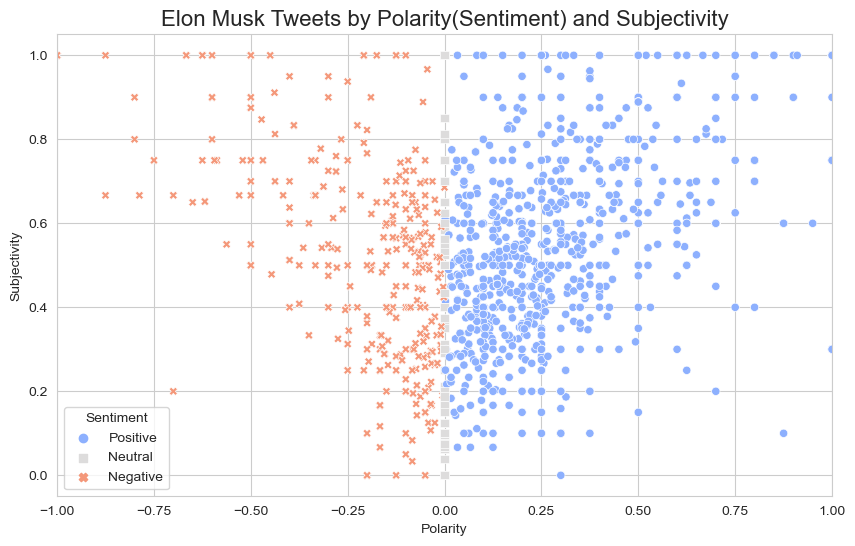

In [33]:
# Create scatter plot to show on y axis the Subjectivity and in the x axis the Polarity
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'coolwarm').set(xlim=(-1,1))
plt.title('Elon Musk Tweets by Polarity(Sentiment) and Subjectivity', size= 16)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

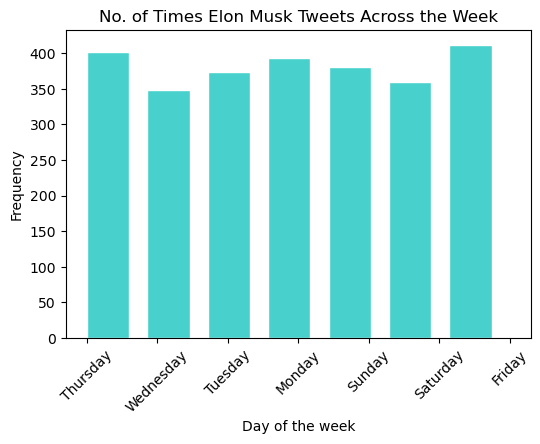

In [34]:
#Number of times elon musk tweets acroos the week 
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.Day_of_Week, bins = 7, 
         width = 0.6, color = "mediumturquoise", edgecolor = "white")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.xticks(rotation= 45)
plt.title("No. of Times Elon Musk Tweets Across the Week")
plt.grid(False)
plt.show()

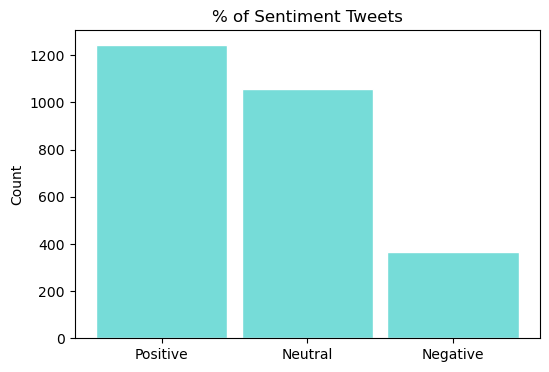

In [79]:
#plot Number of tweets by sentiments
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
sns.histplot(df, x = 'Sentiment', color = 'mediumturquoise',edgecolor = "white", shrink = 0.9).set(xlabel = None)

# adding annotations and visuals
plt.title("% of Sentiment Tweets")
plt.grid(False)
plt.show()

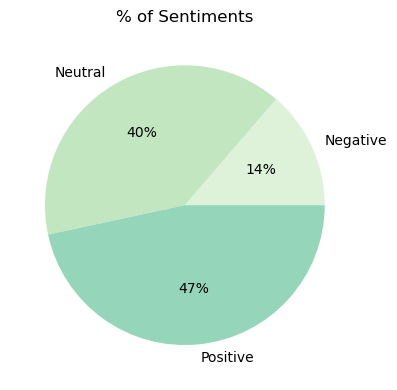

In [37]:
# plotting pie chart:  Percentage of Retweets by Sentiments
labels = Sentiments_goup.keys()
plt.figure(figsize=(6,4))
colours = ["lightcoral", "lightgreen", "lightblue"]
colors= sns.color_palette('GnBu')
explode = [0,0,0]
plt.style.use("default")
plt.pie(Sentiments_goup,labels=labels,
        colors = colors, 
        explode = explode, autopct = "%1.0f%%")
plt.title("% of Sentiments")
plt.tight_layout()
plt.show()

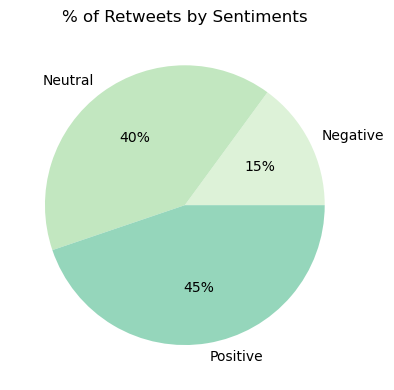

In [38]:
# plotting pie chart:  Percentage of Retweets by Sentiments
labels = retweets_group.keys()
plt.figure(figsize=(6,4))
colours = ["lightcoral", "lightgreen", "lightblue"]
colors= sns.color_palette('GnBu')
explode = [0,0,0]
plt.style.use("default")
plt.pie(retweets_group,labels=labels,
        colors = colors, 
        explode = explode, autopct = "%1.0f%%")
plt.title("% of Retweets by Sentiments")
plt.tight_layout()
plt.show()

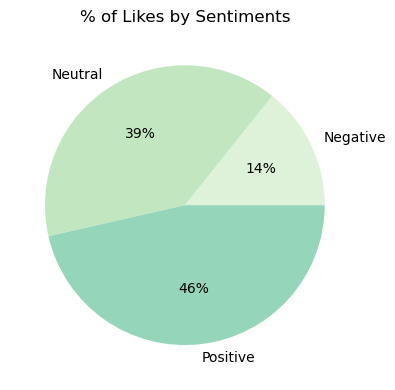

In [39]:
# plotting pie chart: Percentage of Likes by Sentiments
labels = likes_group.keys()
plt.figure(figsize=(6,4))
colours = ["lightcoral", "lightgreen", "lightblue"]
colors= sns.color_palette('GnBu')
explode = [0,0,0]
plt.style.use("default")
plt.pie(likes_group,labels=labels,
        colors = colors, 
        explode = explode, autopct = "%1.0f%%")
plt.title("% of Likes by Sentiments")
plt.tight_layout()
plt.show()

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


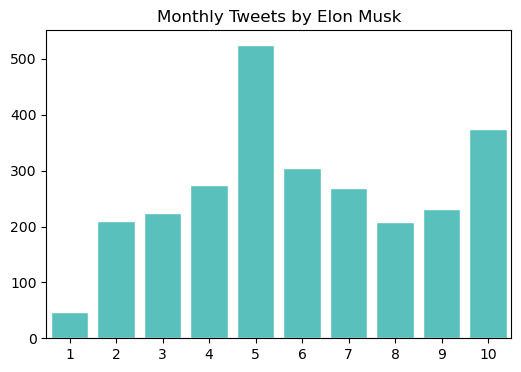

In [71]:
#bar plot Number of tweets by month

Values= list(tweet_month.values)
index= list(tweet_month.index)
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
sns.barplot( index, Values, color = 'mediumturquoise',edgecolor = "white")
# adding annotations and visuals
plt.title("Monthly Tweets by Elon Musk")
plt.grid(False)
plt.show()

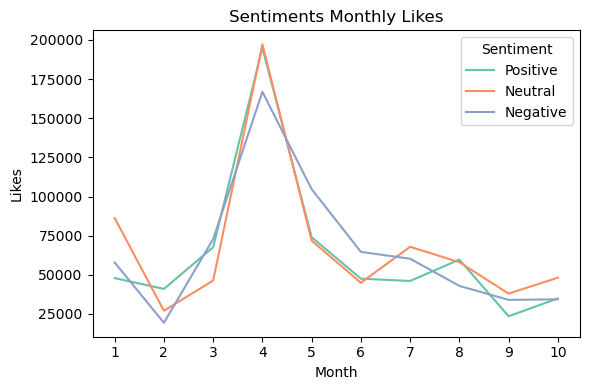

In [78]:
 #Creating month column for time analysis

# Creating a plot to show number of likes depending on sentiment through time
plt.figure(figsize = (6, 4))
months = df['Month'].unique()
sns.lineplot(x = 'Month', y = 'Likes', hue = 'Sentiment', ci = None, data = df, palette = 'Set2')
plt.title('Sentiments Monthly Likes')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])
plt.tight_layout()

## 5) Share

<b>Presenting again the analyasis questions: 

<b>1. How many tweets are defined as Positive, Negative &  Neutral sentiments?
    
<b> 2. In what months the tweets by Elon musk are higher comparison to other months across the year?  
    
<b> 2. In what day/days across the week the tweets by Elon musk are higher?  

<b>The Summary of the data is the following:
    
<b>In the data ahead the total number of tweets in 2022 is 2668, 14,935,619  Retweets and 180,360,594 Likes. Elon Musk's tweeted 251 days overall. On average he tweets 10.6 tweets a day. 
<b>The average of Subjectivity is 0.35, depending on the Subjectivity analysis, Subjectivity score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information.
average of 0.35 means that  most of the tweets are objective (fact tweets). although the average number of total Subjectivity is 0.35, the negative and positive sentiment stands on 0.54 . which mean that the negative and positive tweets of Elon Musk are between objectivity and subjectivity.  </b>


<b>
    The bar plot "% of Sentiment Tweets" demonstrates the numbers of Sentiment from all the data set as the following: 

- <b> Sentiment Negative-  365

- <b> Sentiment Neutral-  1059

- <b> Sentiment Positive-  1244
</b>
    <b>
        Clearly we can analyze that most of the tweets of Elon Musk are positive sentiment,  and just 14% of total tweets are negative. 
        
        
<b>From the three pie charts above: 
    
- <b>Percentage of Likes by Sentiments
- <b>Percentage of Retweet by Sentiments 
- <b>Percentage of Polarity by Sentimentss
        
 <b>We can declare confidently that there is positive correlation between the sentiment of the tweet and the Likes and Retweets. Each time Elon Musk tweets a positive tweet he gets the percent amount of like and retweets and vice versa. 

   <b> 
  <b> 
      Using the scatter plot "Elon Musk Tweets by Sentiment and Subjectivity" to discover the correlation between sentiment and subjectivity. the scatter doesn't show exactly how many neutral sentiments are. but clearly we can declare that more positive sentimens tweets lays between scores 0.3 and 0.5, that's mean that more positive sentimens tweets are objective and facts and less opinions.</b>   
       
<b>  The bar chart doesn't till a much about the pattern tweets of Elon musk, he tweets across all week, the numbers gets higher a bit on fridays and drops on wednesdays. 

<b> Analysing the line chart of "Sentiments Monthly Likes" shows the change of likes over months, between March and May the numbers getting very high, there is a clearly sharp increase between these months, the numbers drops to the regular usage after may. we can assume this increasing is related to the purchase of twitter by Elon musk that time. 
The same increase we get from the data when analysing the bar chart "Monthly tweets by Elon Musk", in May there is a sharp increase of tweets by Elon Musk, i choose to use the same analysis, in these month he made the purchase of twitter. 